# **ANALYZING AMAZON SALES DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()


Saving Amazon Sales data.csv to Amazon Sales data (1).csv


In [ ]:
df = pd.read_csv('Amazon Sales data.csv')

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.shape

(100, 14)

In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
print(df.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


#### We can observe that there is no null values or missing values in the dataset

--------------------------------------------------------------------------

## Data Transformation

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Month-wise Sales Trend:

In [ ]:
month_wise_sales = df.groupby('Order Month')['Total Revenue'].sum().reset_index()
month_wise_sales

,Order Month,Total Revenue
0,1,10482467.12
1,2,24740517.77
2,3,2274823.87
3,4,16187186.33
4,5,13215739.99
5,6,5230325.77
6,7,15669518.50
7,8,1128164.91
8,9,5314762.56
9,10,15287576.61


In [ ]:
month_wise_sales.describe()

,Order Month,Total Revenue
count,12.000000,1.200000e+01
mean,6.500000,1.144573e+07
std,3.605551,7.406999e+06
min,1.000000,1.128165e+06
25%,3.750000,5.293653e+06
50%,6.500000,1.184910e+07
75%,9.250000,1.579894e+07
max,12.000000,2.474052e+07


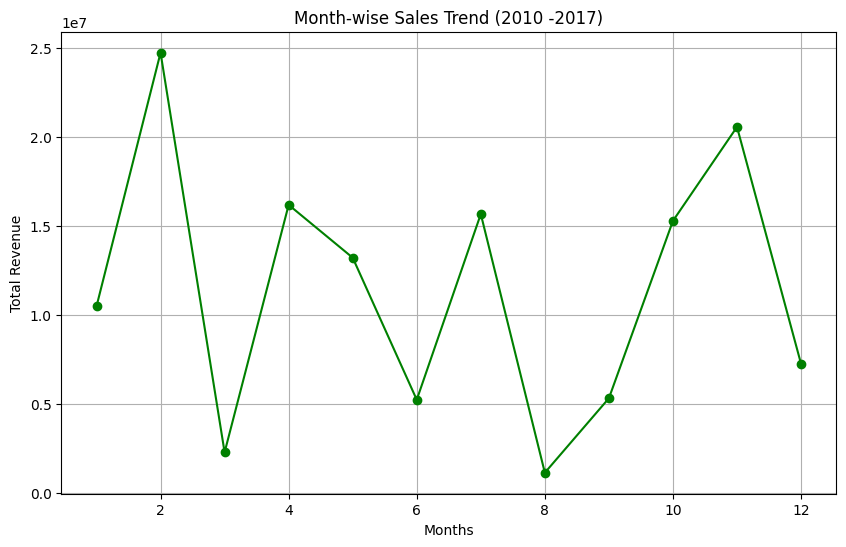

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(month_wise_sales['Order Month'], month_wise_sales['Total Revenue'], marker = 'o', color = 'green')
plt.title('Month-wise Sales Trend (2010 -2017)')
plt.xlabel('Months')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

#### Observation:

As we can observe from the above Line Plot, the month of February has had the highest sales throughout the years, followed by November and April. February having the highest sales can be due to post-holiday sales, Valentine's Day promotions, or the end of financial year clearances in certain regions.

November typically sees high sales due to major shopping events such as Black Friday, Cyber Monday, and the beginning of the holiday shopping season.

April may be affected by spring sales, tax refunds, or Easter-related promotions.

From the above observation, it is quite evident that Amazon likely runs effective marketing campaigns or promotions during these months and also likely gives higher discounts on the products, resulting in higher sales volume.

Given the higher sales during these months, the company needs to make sure to stockpile goods and products during this period to maintain and increase the revenue. Marketing and promoting products more during this period can also help attract more customers and gain more revenue.


# Year-wise Sales Trend:

In [ ]:
year_wise_sales = df.groupby('Order Year')['Total Revenue'].sum().reset_index()
year_wise_sales

,Order Year,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


In [ ]:
year_wise_sales.describe()

,Order Year,Total Revenue
count,8.00000,8.000000e+00
mean,2013.50000,1.716860e+07
std,2.44949,6.841909e+06
min,2010.00000,1.112917e+07
25%,2011.75000,1.241420e+07
50%,2013.50000,1.500182e+07
75%,2015.25000,1.947213e+07
max,2017.00000,3.189864e+07


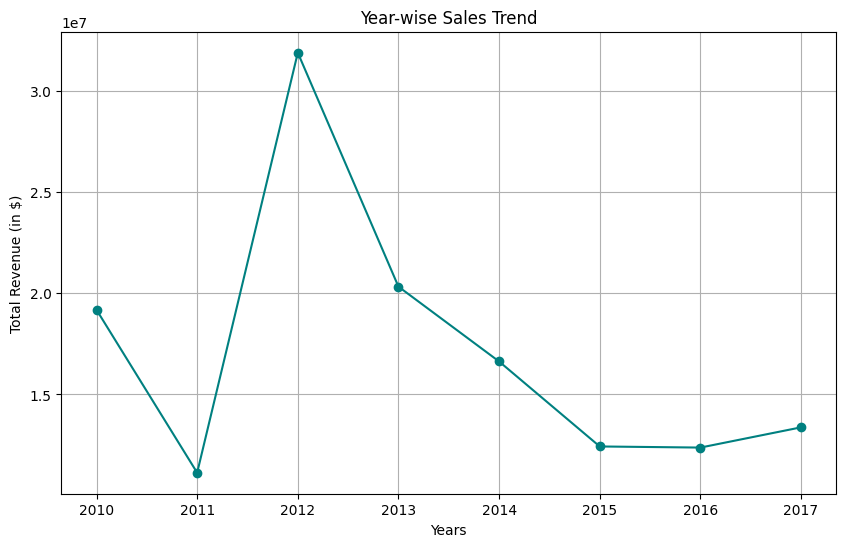

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(year_wise_sales['Order Year'], year_wise_sales['Total Revenue'], marker = 'o', color = 'teal')
plt.title('Year-wise Sales Trend')
plt.xlabel('Years')
plt.ylabel('Total Revenue (in $)')
plt.grid(True)
plt.show()

#### Observation

We can observe that 2012 had the highest revenue which was a massive rise from the total revene in 2011. But after 2012, the sales went on a downward trend where it consistently dropped year by year. Compared to 2016, we can see that 2017 gained a little more revenue which disrupted the consistent downward trend.

The drastic drop in sales after 2012 could be due to high competition from other online shopping sites. New competitions might have joined the race or the existing competition might have improved their offerings and quality of products which reflects the drop in sales in the case of Amazon.

Economy could also be a reason for the drop because a lot of countries go through economic crisis and issues that affects the consumer spending habits.

# Yearly Month-wise Sales Trend:

In [ ]:
yearly_month_wise_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()
yearly_month_wise_sales

,Order Year,Order Month,Total Revenue
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00
5,2010,12,2581786.39
6,2011,1,1042225.35
7,2011,2,387002.20
8,2011,4,2798046.49
9,2011,5,272410.45


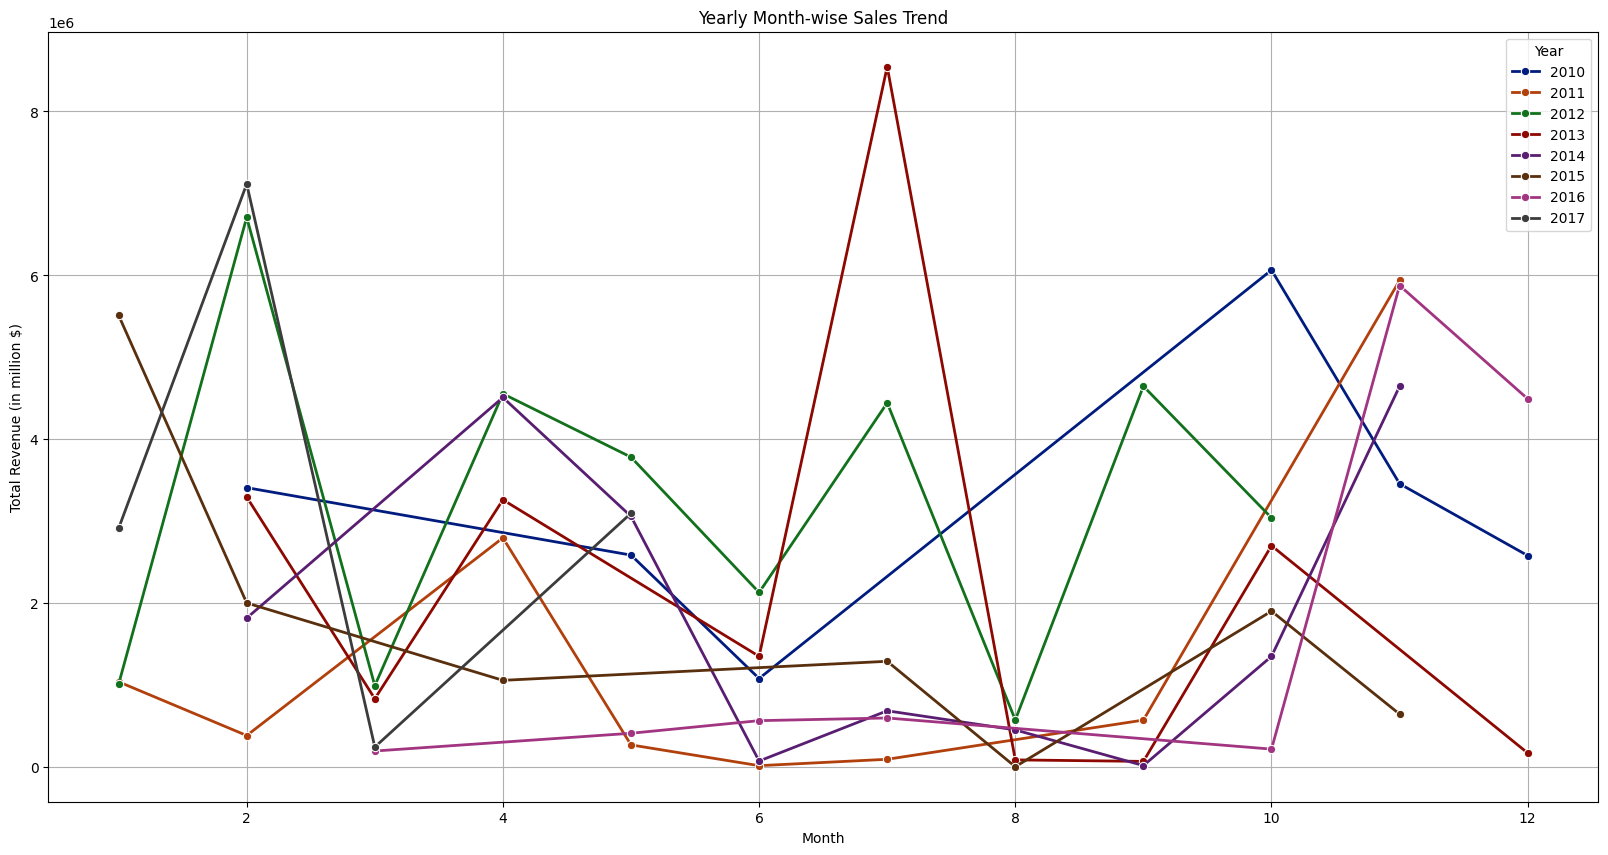

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=yearly_month_wise_sales, x='Order Month', y='Total Revenue', hue='Order Year', palette='dark', linewidth=2, marker='o')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in million $)')
plt.legend(title='Year')

plt.grid(True)
plt.show()

#### Observation

We can see that the month of July in 2013 had the highest revenue ever while 2012, had the most consistent high revenue overall. As per our previous observations, we can also see that the month of February, April and November has had a pretty consistent high revenue trend in throughout the years.
###### ______________________________________________________________________________________________________________________________________________________________________

We now look at some other trends and observation from the given dataset for a better understanding and prediction for effiecient sales revenue

# Top Selling Product Category

In [ ]:
sales_by_item = df.groupby('Item Type')['Units Sold'].sum().reset_index()
sales_by_item

,Item Type,Units Sold
0,Baby Food,40545
1,Beverages,56708
2,Cereal,25877
3,Clothes,71260
4,Cosmetics,83718
5,Fruits,49998
6,Household,44727
7,Meat,10675
8,Office Supplies,46967
9,Personal Care,48708


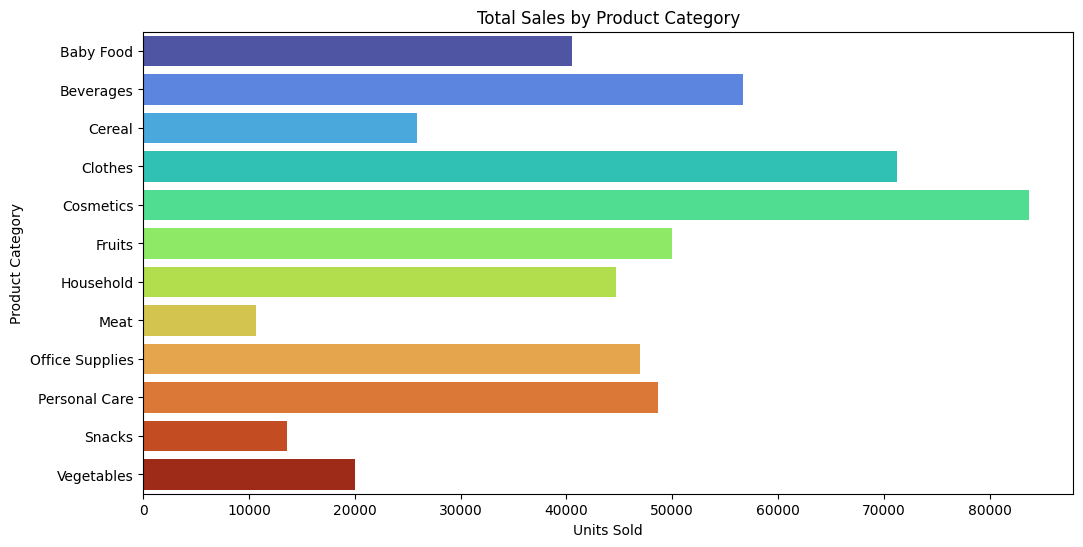

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_item, x='Units Sold', y='Item Type', hue = 'Item Type', palette='turbo')
plt.title('Total Sales by Product Category')
plt.xlabel('Units Sold')
plt.ylabel('Product Category')
plt.show()


#### Observation
We can see that Cosmetics is the most sold product category followed by Clothes and Beverages. From this observation, we can predict that the sales trend will continue the same way and so, Amazon should focus on promoting and advertising these type of products more and apply sales and discount to these products.

# Sales by Region

In [ ]:
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
region_sales

,Region,Total Revenue
0,Asia,21347091.02
1,Australia and Oceania,14094265.13
2,Central America and the Caribbean,9170385.49
3,Europe,33368932.11
4,Middle East and North Africa,14052706.58
5,North America,5643356.55
6,Sub-Saharan Africa,39672031.43


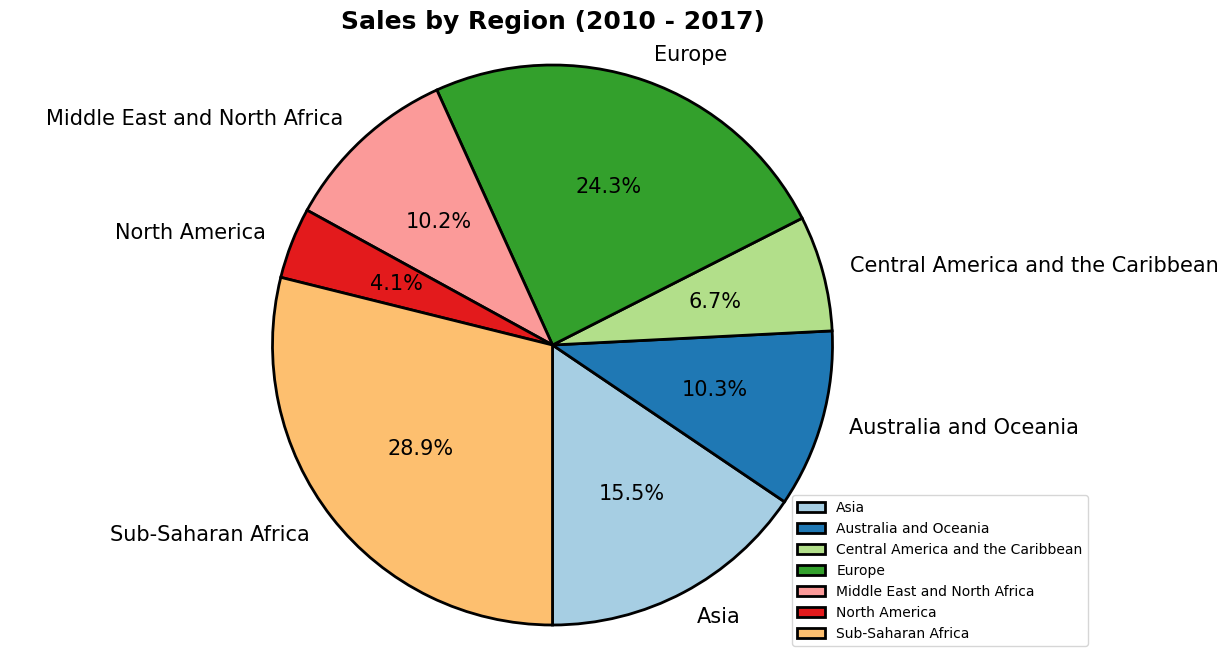

In [ ]:
plt.figure(figsize=(14,8))
plt.pie(region_sales['Total Revenue'], labels=region_sales['Region'], colors=sns.color_palette("Paired", len(region_sales)), autopct = '%0.1f%%'
        , shadow = False ,startangle = 270
        , textprops = {'fontsize':15}
        , wedgeprops = {'linewidth':2,'width':1,'edgecolor':'k'})

plt.title('Sales by Region (2010 - 2017)', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.legend(loc = 4)
plt.show()

#### Observation
As per the pie-chart we plotted, we can see that the Sub-Saharan Region has provided the most revenue for Amazon with 28.9% of the total sales, followed by Europe with 24.3% and Asia with 15.5% of the total sales.